#  Gilled Mushroom Classification: Is a Mushroom Edible or Poisonous?
<p align="center">
<img src="https://github.com/Lwhieldon/IstheMushroomPoisonous/blob/master/notebooks+data+images/images/UK_advice-gardening-grow-your-own-poisonous-edible-mushrooms_header.jpg?raw=true"  style="width: 1000px;"  />
</p>


# Abstract

Mushrooms (a.k.a. Fungi) have incredible use for humankind: From medicine, food, packaging & even biofuel, fungi have the potential to unlock biological material and convert it into something else entirely useful. But if a mushroom was foraged by an inexperienced person, they could suffer from gastrointestinal issues or even death. Small business communities of mushroom foragers are now more than ever seeing a rise in the interest of fungi throughout the world and are trying to find ways to combat the fatalities that arise from consuming poisonous mushrooms.

In this project, I will pretend that I am a data scientist hired by a business community of local mushroom foragers in Oregon and they need my help to build out a better process to identify if gilled mushrooms are poisonous or edible; they have a bunch of 'young' fungi foragers who need a little help!

I first look at the characteristics of a gilled mushroom and do a cross comparison between the features that are edible and poisonous. Interestingly, edible and poisonous mushrooms often share the same characteristics! There's no real definitive way to tell based on specific characteristics, so that makes it all more important for us to help build a classification model.

I compare 3 classification models for accuracy: Logistic Regression, k-Nearest Neighbors, and Decision Trees. k-Nearest Neighbors performs the best and logisitc regression performs the worst in precision, recall, and f1-score. To help enhance the model, I'd like to propose that the mushroom foragers collect not just gilled mushrooms but all different types. And lastly, I propose the expansion of this study to encompass a more global scale.


# Introduction & Motivation

Is it possible to tell if a gilled mushroom in North American is poisonous or not just by its physical characteristics? In this project, I compare different classification algorithms to predict if a gilled mushroom in North America is edible or if it will lead to certain death!

Mushrooms (a.k.a. Fungi) have a multitude of uses for humankind. From medicine, food, and even for esoteric uses like packaging & biofuel, fungi have the potential to unlock biological material that's considered a 'waste product' in our civilization and convert it into something else entirely useful. Small business communities of mushroom foragers are now more than ever seeing a rise in the interest of fungi throughout the world.[<sup>1</sup>](#fn1)

Mushrooms are equally as useful as they are morbid: In a study conducted in Turkey in 2018, it was discovered that environmental foraging of mushrooms can result in serious illness and death, resulting in a 20% mortality rate in adults and 50% in children who consume poisonous mushrooms.[<sup>2</sup>](#fn2) It is apparent that the mushroom foraging industry needs quality measures to ensure that these statistics decrease.

In this project, I will pretend that I am a data scientist hired by a business community of local mushroom foragers in Oregon and they need my help to build out a better process to identify if gilled mushrooms are poisonous or edible; they have a bunch of 'young' foragers who need a little help!

# Exploratory Data Analysis



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
%matplotlib inline

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

## Data Cleaning

Let's perform some basic exploratory data analysis first. The data is categorical in nature: For each class (p=poisonous & e=edible), there is a letter that corresponds to the type of feature it possesses. Above snippet shows what the columns look like.

And Great news! All characteristics are provided for each observation's features. This saves us a ton of time in data cleaning & prep (see below).

In [3]:
#Checking for missing values

for col in data.columns:
    print("{} : {}".format(col,data[col].isnull().sum()))

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


The good news is we have a balanced mix of edible v. poisonous mushrooms. This should help us build a solid classification model. (See graph below).

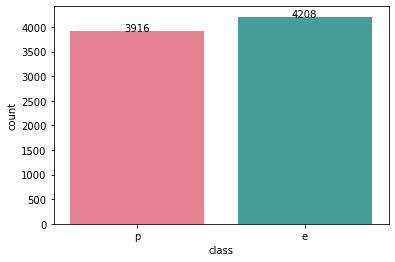

In [4]:
x = data['class']

ax = sns.countplot(x=x, data=data,palette='husl')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

Let's review the basics of the gilled mushroom anatomy to help us visualize each feature:

<img src="https://github.com/Lwhieldon/IstheMushroomPoisonous/blob/master/notebooks+data+images/images/mushroom%20anatomy.png?raw=true"  style="height:500px"/>



In our dataset, we have 4 primary characteristics:

<ol>
    <li><b>Cap Characteristics:</b> Features including <i>cap shape, cap surface, cap color,</i> and <i>bruises</i> all reside at the top of the gilled mushroom.</li>
    <li><b>Gill Characteristics:</b> <i>gill attachment, gill spacing, gill size</i>, and <i>gill color</i> reside underneath of the cap. This is a very important characteristic of a gilled mushroom, releasing their spores and allowing for mushroom progeny.</li>
    <li><b>Stalk Characteristics:</b> <i>stalk shape, stalk root, color & surface above ring, color & surface-below-ring,</i> all can vary in size and depth. </li>
    <li><b>Veil and Ring Characteristics:</b> <i>veil type, veil color, ring number,</i> and <i>ring type</i> are different when a gilled mushroom is young (veil is closed around the cap) versus old (veil unravels into a ring).</li>
</ol>

For a detailed description of what every letter represents for each feature, please refer to the <a href=https://github.com/Lwhieldon/IstheMushroomPoisonous/blob/master/notebooks%2Bdata/labels.txt>Dataset Labels</a> in this repo.

 

## Mushroom Characteristics

Are there distinct differences between edible & poisonous gilled mushrooms based on their features? Well, no not exactly.

Upon a closer look, edible & poisonous gilled mushrooms often share similar features, especially with the features captured in this dataset. This is a common problem with mushroom foraging: It's difficult to differentiate edible versus poison mushrooms without a skilled eye and significant experience [<sup>3</sup>](#fn3)

This makes me feel that we need to build a model to help predict mushroom edibility all the more!


### Cap Characteristics

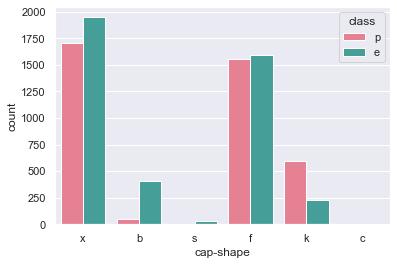

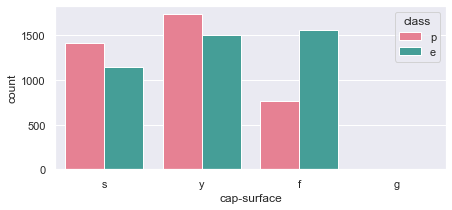

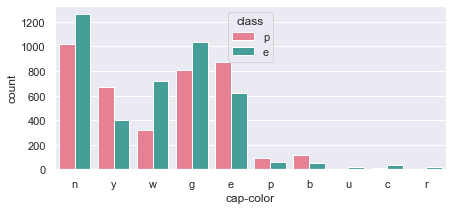

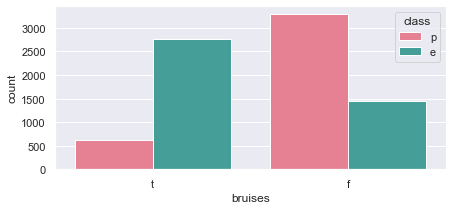

In [5]:
hue = data['class']
data_for_plot = data[["cap-shape","cap-surface" ,"cap-color","bruises"]]

utils.data_plot(hue, data_for_plot)

The cap has no distinguishing traits for poisonous or edible gilled mushrooms: The distribution between each characteristic shows they share similar features.

### Gill Characteristics

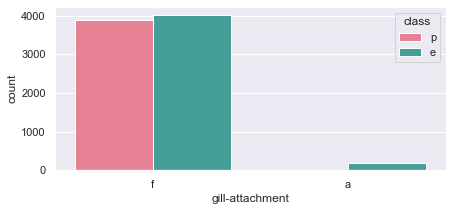

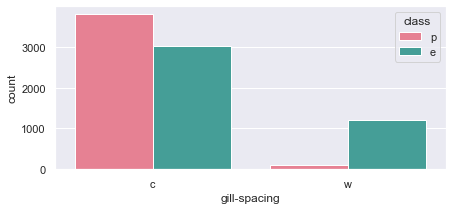

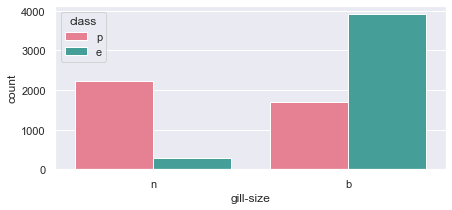

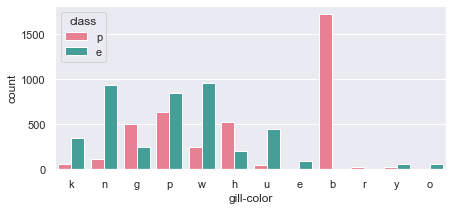

In [6]:
hue = data['class']
data_for_plot = data[["gill-attachment","gill-spacing" ,"gill-size","gill-color"]]

utils.data_plot(hue, data_for_plot)

What stands out immediately is that brown gill color in a gilled mushroom is often poisonous! But outside of that observation, it's hard to determine if a gilled mushroom is poisonous or edible because they share similar characteristics for gill size, spacing, and attachment.

### Stalk characteristics

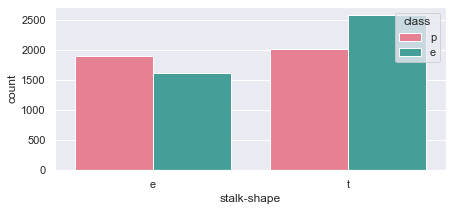

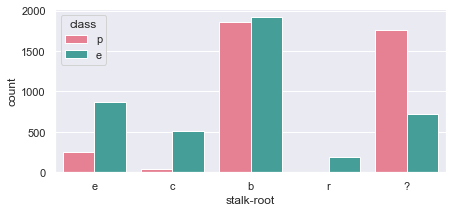

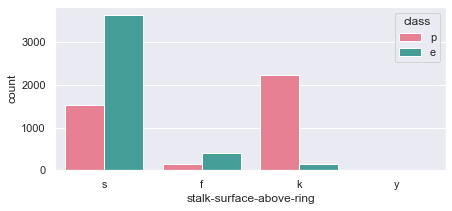

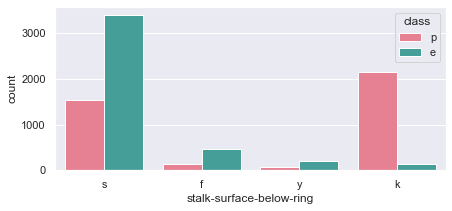

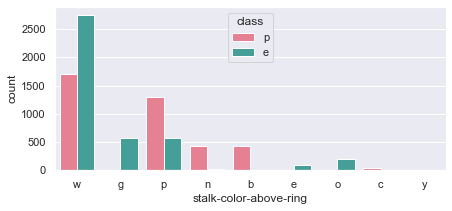

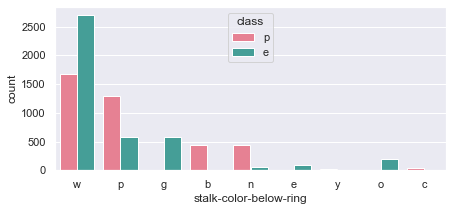

In [7]:
hue = data['class']
data_for_plot = data[["stalk-shape","stalk-root" ,"stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring"]]

utils.data_plot(hue, data_for_plot)

A silky stalk surface above & below the ring is a likely indicator that a mushroom is poisonous but there isn't a ton of striking features related to stalk color, root or shape that would give an indication that the mushroom is poisonous or edible.  

### Veil & Ring Characteristics

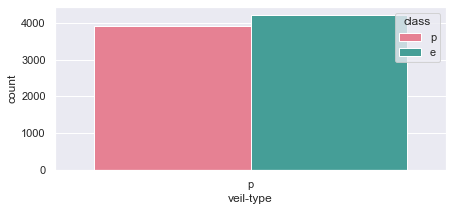

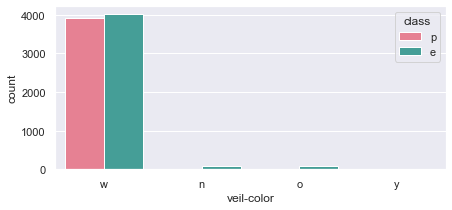

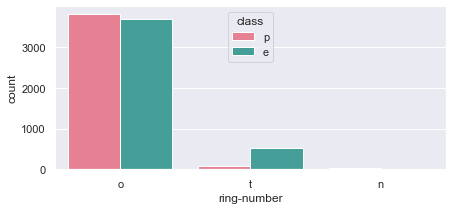

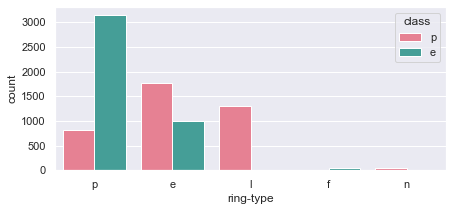

In [8]:
hue = data['class']
data_for_plot = data[["veil-type","veil-color" ,"ring-number","ring-type"]]

utils.data_plot(hue, data_for_plot)

As with the other types of features of a gilled mushroom, it doesn't look like the ring or veil show of a difference between edible v poisonous. 

## Feature engineering

In order for our model to perform at its best, we will perform the following feature engineering:

1. <b>Response Variable</b>: Replace edible (e) with 0 and poisonous (p) with 1
2. <b>Predictor Label Encoding</b>: Encode predictor labels with value between 0 and n_classes-1
3. <b>Standardize Features</b>: Standardize features by removing the mean and scaling to unit variance
4. <b>Apply Principal Component Analysis (PCA)</b>: Convert our features in order to better visualize how our features can effectively predict our labels (poison or edible) on a 2D plane

Additionally, we break out our dataset into training & testing sets. 20% of our data will be allocated to testing our model.

In [9]:
# Replacing some str datas to int
data['class'] = data['class'].replace("e",0).replace("p",1)

In [10]:
X=data.drop('class',axis=1) #Predictors
y=data['class'] #Response

### LabelEncoder Drawbacks

Note that LabelEncoder assigns a number to each feature attribute; this can cause unintended consequences in giving more influence to the original feature categories within the model. Let's first explore how LabelEncoder affects our model; in future analysis, we may want to use dummy variables instead.

In [11]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

We will now split our training & testing sets so that we only focus on training for further feature engineering.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Why PCA? 

Feature extraction is an important preprocessing step in classification problems. I choose to use PCA in this case because all of the features (with the slight exception of spore color) are generally & equally represented between both poisonous & edible gilled mushrooms. Based on a study in 2008 by Erkmen, B., & Yıldırım, T. who explored the use of Artificial Neural Networks (ANN) with PCA to improve classification performance of sonar targets in the deep sea, they discovered that PCA is a good feature extraction method to improve classification performance as a 'multivariate statistical analysis technique of data compression and feature extraction', which preserves the most useful and relevant information on the feature space.[<sup>4</sup>](#fn4)

In order to better visualize how our features can effectively predict our labels (poison or edible) on a 2D plane, let's convert our features using principal component analysis (PCA) into principal components 1 & 2 (PC1 & PC2 respectively). Note that the axis' are ranked in order of importance; differences along PC 1 are more important than differences along PC2.

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Modeling and Results

For each model, I fit the model to the training set and evaluated the model using the mean accuracy on the test data and labels. I also visualize the test results using 2-Dimensional arrays representing the X and Y coordinates of all the points overlaid with a scatter plot of where our predictors fall between each principal component (this is also a great feature of PCA). 

We will use the same visualization and accuracy score for all models to compare.

### Logistic Regression Model (no penalty)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression()

In [16]:
utils.print_score(classifier,X_test,y_test)

Test results:

Accuracy Score: 0.6382

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       843
           1       0.64      0.55      0.60       782

    accuracy                           0.64      1625
   macro avg       0.64      0.64      0.63      1625
weighted avg       0.64      0.64      0.64      1625


Confusion Matrix:
[[603 240]
 [348 434]]



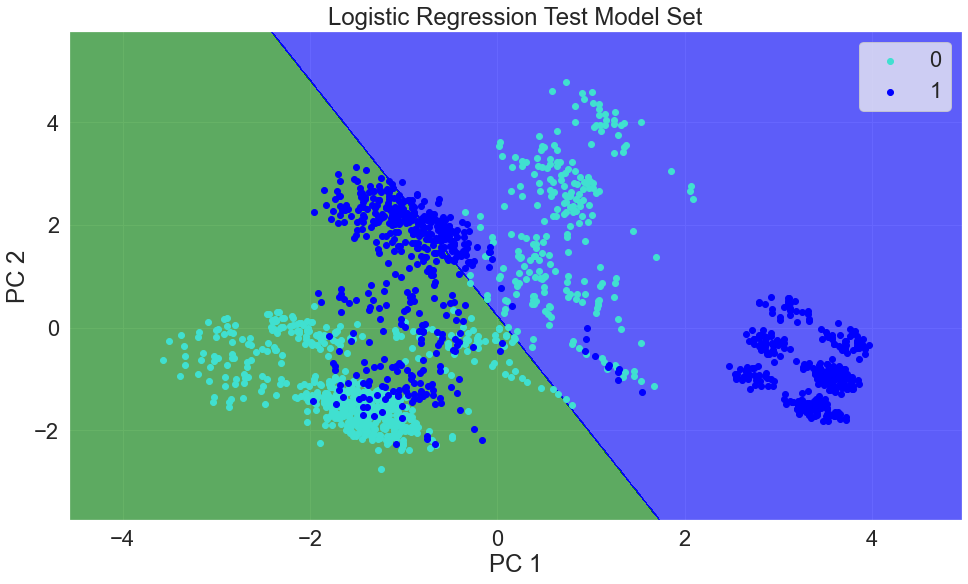

In [17]:
utils.model_visualization('Logistic Regression Test', X_test, y_test,classifier)

### k-Nearest Neighbors Classification Model

In [18]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [19]:
utils.print_score(classifier,X_test,y_test)

Test results:

Accuracy Score: 0.9440

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       843
           1       0.96      0.92      0.94       782

    accuracy                           0.94      1625
   macro avg       0.95      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625


Confusion Matrix:
[[813  30]
 [ 61 721]]



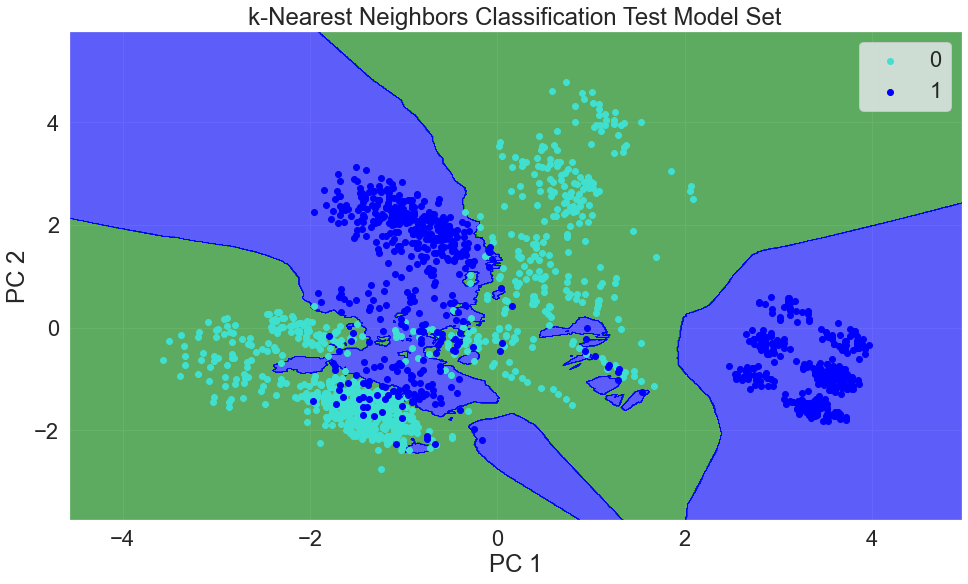

In [20]:
utils.model_visualization('k-Nearest Neighbors Classification Test', X_test, y_test,classifier)

### Decision Tree Classification Model

In [21]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

#### Why Entropy Criterion?

When building a classification tree, the entropy criterion helps the model determine a better quality of a particular split or branch in the tree. This helps specifically when trying to prune the tree of its branches by determining the homogeneity of the branch's population.[<sup>5</sup>](#fn5)

In [22]:
utils.print_score(classifier,X_test,y_test)

Test results:

Accuracy Score: 0.9317

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       843
           1       0.93      0.93      0.93       782

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625


Confusion Matrix:
[[786  57]
 [ 54 728]]



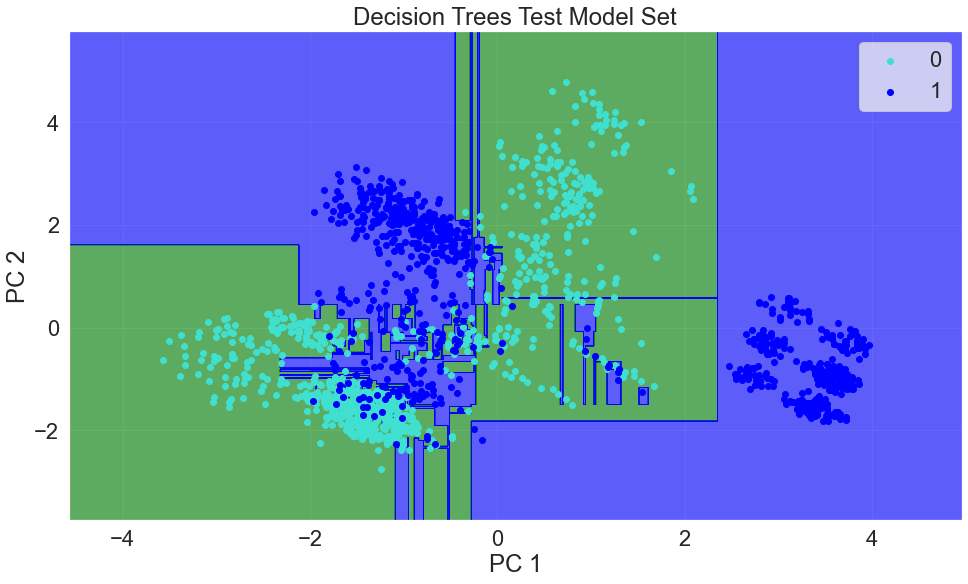

In [23]:
utils.model_visualization('Decision Trees Test', X_test, y_test,classifier)

# Discussion, Conclusion, and Summary

Given our business case where we want to ere on the side of caution when classifiying mushrooms as poisonous, precision scores were the primary focus but let's also look at the recall and f1-score. Interestingly enough, k-Nearest Neighbors had the best precision, recall, and f1-score score out of the 3 models. Logistic regression had the lowest precision, recall, and f1-score. Decision trees were a close second to k-Nearest Neighbors in precision, recall, and f1-score. The confusion matrices for all 3 models demonstrate similar performance metrics. 

Another interesting facet of the data itself is that the 2-D coordinates for poisonous & edible mushrooms supports our original conclusion that it's difficult to determine between the two: One can see that there are 2 distinct clusters for both edible & poisonous mushrooms on the plane. As shown in logistic regression, this model underfits the data because of these distinct, separate clusters. 

Often mushroom foragers will tell you that it takes a trained eye to determine if a mushroom is edible or poisonous. To help them continue to thrive as an industry and to also help reduce the amount of fatalities caused by ingesting poisonous mushrooms, we could apply k-Nearest Neighbor classification model because it has demonstrated its prediction precision. Logistic regression underfits the data and is not recommended.  

 # Limitations and Later Work
 
As we follow up with our mushroom forager community, this study only looked at gilled mushrooms, not any other type of mushroom (of which there are many!). For the next study, I'd like to expand the existing dataset by capturing mushrooms of all types to continue to help the forager community. Ideally, this could also help decrease the fatalities of those who consume foraged mushrooms.
 
Another missing element to this study that could provide benefits is expanding this to a global scale of mushroom collection; this study was only conducted in North America, but countries like China and Turkey could benefit from an analysis of their mushrooms respectively since soil, climate, and topography affect how a mushroom grows and develops.

From a continuation on the models, I'd like to perform different feature engineering to see if we return an even better precision results from our models.  Since eating a poisonous mushroom could cause death, I'd like to get as close to 99% as possible. Instead of using label encoding, I will try applying dummy variables.

# References and Contributions
<br>

<span id="fn1">[1] National Geographic. You Didn’t Know Mushrooms Could Do All This, Jul 13, 2016.  https://youtu.be/BlcKBKJ8uro</span>

<span id="fn2">[2] Yelken, B., & Mantar, K. K. (2020). Mushroom That Break Hearts: A Case Report. Turk J Intensive Care, 18, p. 43-6.</span>

<span id="fn3"> [3] M. Davis, R. Sommer, and J. Menge, <i>Field guide to mushrooms of western North America</i>, vol. 106. Univ of California Press, 2012. p. 40</span>

<span id="fn4"> [4] Erkmen, B., & Yıldırım, T. (2008). Improving classification performance of sonar targets by applying general regression neural network with PCA. Expert Systems with Applications, 35(1-2), p. 472-475.</span>

<span id="fn5"> [5] James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112, p. 312). New York: springer. </span>


